In [1]:

import pandas as pd
import matplotlib.pylab as plt
import warnings
from spacepy import pycdf
from spacepy.time import Ticktock
import os
import numpy as np
import pandas as pd
from spacepy import pycdf
from spacepy.time import Ticktock
# 完全忽略PerformanceWarning
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)

d:\anaconda3\envs\tensorflow\lib\site-packages\spacepy\time.py:2341: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  warnings.warn('Leapseconds may be out of date.'


In [ ]:

combined_df=pd.read_hdf('combined_df_train.h5', key='df')
#随机抽取10%的数据
#combined_df = combined_df.sample(frac=0.5, replace=False, random_state=1565)
combined_df = combined_df[(combined_df['Time'] < '2018-01-01') | (combined_df['Time'] > '2019-01-01')]
combined_df = combined_df[(combined_df['Time'] < '2013-03-10') | (combined_df['Time'] > '2013-04-10')]
combined_df = combined_df[(combined_df['Time'] < '2015-08-25') | (combined_df['Time'] > '2015-09-25')]


In [19]:
print(combined_df)

                          Time          Flux    I         L        MLT  \
0      2013-02-22 03:01:10.666  3.721204e+03  3.0  4.197638  23.058615   
1      2013-02-22 03:04:38.352  6.332605e+06  3.0  4.270892  23.136263   
2      2013-02-22 03:05:54.837  7.105841e+06  3.0  4.297360  23.164238   
3      2013-02-22 03:06:27.625  8.044091e+06  3.0  4.308626  23.176107   
4      2013-02-22 03:14:39.477  2.061341e+07  3.0  4.471600  23.347633   
...                        ...           ...  ...       ...        ...   
502959 2017-12-31 22:00:59.139  1.848249e+05  3.0  2.443496  12.551610   
502960 2017-12-31 22:02:03.602  7.956339e+04  3.0  2.405294  12.622583   
502961 2017-12-31 22:04:12.532  3.981317e+04  3.0  2.328155  12.771583   
502962 2017-12-31 22:09:24.119  3.686938e+04  3.0  2.138041  13.176195   
502963 2017-12-31 22:11:33.051  4.589776e+04  3.0  2.058079  13.365533   

               X         Y         Z  Flux_Error  energy_kev  ... AE_150h  \
0       2.404097 -3.365859 -0.6066

In [20]:
print(combined_df.columns)

Index(['Time', 'Flux', 'I', 'L', 'MLT', 'X', 'Y', 'Z', 'Flux_Error',
       'energy_kev',
       ...
       'AE_150h', 'AL_150h', 'AU_150h', 'BZGSM_IS1_150h', 'TEMP_IS1_150h',
       'PDYN_IS1_150h', 'F107_IS1_150h', 'VX_150h', 'SYMH_150h',
       'VX_IS1_150h'],
      dtype='object', length=2412)


In [26]:
print(combined_df.shape)

(484783, 2412)


In [27]:
print(combined_df.isnull().sum().tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [28]:
print(combined_df)

                          Time          Flux    I         L        MLT  \
0      2013-02-22 03:01:10.666  3.721204e+03  3.0  4.197638  23.058615   
1      2013-02-22 03:04:38.352  6.332605e+06  3.0  4.270892  23.136263   
2      2013-02-22 03:05:54.837  7.105841e+06  3.0  4.297360  23.164238   
3      2013-02-22 03:06:27.625  8.044091e+06  3.0  4.308626  23.176107   
4      2013-02-22 03:14:39.477  2.061341e+07  3.0  4.471600  23.347633   
...                        ...           ...  ...       ...        ...   
502959 2017-12-31 22:00:59.139  1.848249e+05  3.0  2.443496  12.551610   
502960 2017-12-31 22:02:03.602  7.956339e+04  3.0  2.405294  12.622583   
502961 2017-12-31 22:04:12.532  3.981317e+04  3.0  2.328155  12.771583   
502962 2017-12-31 22:09:24.119  3.686938e+04  3.0  2.138041  13.176195   
502963 2017-12-31 22:11:33.051  4.589776e+04  3.0  2.058079  13.365533   

               X         Y         Z  Flux_Error  energy_kev  ... AE_150h  \
0       2.404097 -3.365859 -0.6066

In [29]:
columns_list = combined_df.columns.tolist()
print(columns_list)


['Time', 'Flux', 'I', 'L', 'MLT', 'X', 'Y', 'Z', 'Flux_Error', 'energy_kev', 'datetime_hour', 'datetime_minus_h', 'BZGSM_1h', 'TEMP_1h', 'PDYN_1h', 'Kp_1h', 'Dst_1h', 'F107_1h', 'AE_1h', 'AL_1h', 'AU_1h', 'BZGSM_IS1_1h', 'TEMP_IS1_1h', 'PDYN_IS1_1h', 'F107_IS1_1h', 'VX_1h', 'SYMH_1h', 'VX_IS1_1h', 'BZGSM_2h', 'TEMP_2h', 'PDYN_2h', 'Kp_2h', 'Dst_2h', 'F107_2h', 'AE_2h', 'AL_2h', 'AU_2h', 'BZGSM_IS1_2h', 'TEMP_IS1_2h', 'PDYN_IS1_2h', 'F107_IS1_2h', 'VX_2h', 'SYMH_2h', 'VX_IS1_2h', 'BZGSM_3h', 'TEMP_3h', 'PDYN_3h', 'Kp_3h', 'Dst_3h', 'F107_3h', 'AE_3h', 'AL_3h', 'AU_3h', 'BZGSM_IS1_3h', 'TEMP_IS1_3h', 'PDYN_IS1_3h', 'F107_IS1_3h', 'VX_3h', 'SYMH_3h', 'VX_IS1_3h', 'BZGSM_4h', 'TEMP_4h', 'PDYN_4h', 'Kp_4h', 'Dst_4h', 'F107_4h', 'AE_4h', 'AL_4h', 'AU_4h', 'BZGSM_IS1_4h', 'TEMP_IS1_4h', 'PDYN_IS1_4h', 'F107_IS1_4h', 'VX_4h', 'SYMH_4h', 'VX_IS1_4h', 'BZGSM_5h', 'TEMP_5h', 'PDYN_5h', 'Kp_5h', 'Dst_5h', 'F107_5h', 'AE_5h', 'AL_5h', 'AU_5h', 'BZGSM_IS1_5h', 'TEMP_IS1_5h', 'PDYN_IS1_5h', 'F107_IS1

In [30]:
#将combined_df随机打乱
combined_df = combined_df.sample(frac=1).reset_index(drop=True)
print(combined_df)

                          Time          Flux    I         L        MLT  \
0      2016-05-12 19:51:15.927  5.330689e+07  3.0  4.223014   3.800053   
1      2013-07-22 08:01:30.159  3.876414e+07  1.0  5.878499  20.053804   
2      2015-12-07 15:31:24.908  2.453661e+07  1.0  6.084557  12.183028   
3      2014-02-13 20:57:38.071  5.351685e+07  1.0  5.631297  12.951083   
4      2017-05-15 17:25:43.897  1.022825e+07  1.0  5.714824  17.428272   
...                        ...           ...  ...       ...        ...   
484778 2014-11-14 17:18:40.669  2.661339e+07  1.0  5.622531   3.587927   
484779 2016-05-09 11:25:48.897  1.236633e+08  1.0  4.976288   4.820228   
484780 2016-06-16 06:42:05.485  2.644185e+07  1.0  5.824269   4.967784   
484781 2017-04-23 20:39:33.033  6.017465e+07  1.0  5.541133  18.518780   
484782 2016-05-12 20:13:36.180  5.247630e+07  3.0  4.801862   4.367786   

               X         Y         Z  Flux_Error  energy_kev  ... AE_150h  \
0      -1.569924  3.341075 -0.6542

In [31]:
time_steps=120
VX_time1 = [f'VX_{i}h' for i in range(1, time_steps + 1)]
SYMH_time2 = [f'SYMH_{i}h' for i in range(1, time_steps + 1)]
VX_IS1_time3 = [f'VX_IS1_{i}h' for i in range(1, time_steps + 1)]
BZGSM_time4 = [f'BZGSM_{i}h' for i in range(1, time_steps + 1)]
TEMP_time5 = [f'TEMP_{i}h' for i in range(1, time_steps + 1)]
PDYN_time6 = [f'PDYN_{i}h' for i in range(1, time_steps + 1)]
Kp_time7 = [f'Kp_{i}h' for i in range(1, time_steps + 1)]
Dst_time8 = [f'Dst_{i}h' for i in range(1, time_steps + 1)]
F107_time9 = [f'F107_{i}h' for i in range(1, time_steps + 1)]
AE_time10 = [f'AE_{i}h' for i in range(1, time_steps + 1)]
AL_time11 = [f'AL_{i}h' for i in range(1, time_steps + 1)]
AU_time12 = [f'AU_{i}h' for i in range(1, time_steps + 1)]
BZGSM_IS1_time13 = [f'BZGSM_IS1_{i}h' for i in range(1, time_steps + 1)]
TEMP_IS1_time14 = [f'TEMP_IS1_{i}h' for i in range(1, time_steps + 1)]
PDYN_IS1_time15 = [f'PDYN_IS1_{i}h' for i in range(1, time_steps + 1)]
F107_IS1_time16 = [f'F107_IS1_{i}h' for i in range(1, time_steps + 1)]


In [32]:
print(VX_time1)

['VX_1h', 'VX_2h', 'VX_3h', 'VX_4h', 'VX_5h', 'VX_6h', 'VX_7h', 'VX_8h', 'VX_9h', 'VX_10h', 'VX_11h', 'VX_12h', 'VX_13h', 'VX_14h', 'VX_15h', 'VX_16h', 'VX_17h', 'VX_18h', 'VX_19h', 'VX_20h', 'VX_21h', 'VX_22h', 'VX_23h', 'VX_24h', 'VX_25h', 'VX_26h', 'VX_27h', 'VX_28h', 'VX_29h', 'VX_30h', 'VX_31h', 'VX_32h', 'VX_33h', 'VX_34h', 'VX_35h', 'VX_36h', 'VX_37h', 'VX_38h', 'VX_39h', 'VX_40h', 'VX_41h', 'VX_42h', 'VX_43h', 'VX_44h', 'VX_45h', 'VX_46h', 'VX_47h', 'VX_48h', 'VX_49h', 'VX_50h', 'VX_51h', 'VX_52h', 'VX_53h', 'VX_54h', 'VX_55h', 'VX_56h', 'VX_57h', 'VX_58h', 'VX_59h', 'VX_60h', 'VX_61h', 'VX_62h', 'VX_63h', 'VX_64h', 'VX_65h', 'VX_66h', 'VX_67h', 'VX_68h', 'VX_69h', 'VX_70h', 'VX_71h', 'VX_72h', 'VX_73h', 'VX_74h', 'VX_75h', 'VX_76h', 'VX_77h', 'VX_78h', 'VX_79h', 'VX_80h', 'VX_81h', 'VX_82h', 'VX_83h', 'VX_84h', 'VX_85h', 'VX_86h', 'VX_87h', 'VX_88h', 'VX_89h', 'VX_90h', 'VX_91h', 'VX_92h', 'VX_93h', 'VX_94h', 'VX_95h', 'VX_96h', 'VX_97h', 'VX_98h', 'VX_99h', 'VX_100h', 'VX_101

In [33]:
X_time1 = combined_df[VX_time1].values  
X_time2 = combined_df[SYMH_time2].values 
X_time3 = combined_df[VX_IS1_time3].values
X_time4 = combined_df[BZGSM_time4].values
X_time5 = combined_df[TEMP_time5].values
X_time6 = combined_df[PDYN_time6].values
X_time7 = combined_df[Kp_time7].values
X_time8 = combined_df[Dst_time8].values
X_time9 = combined_df[F107_time9].values
X_time10 = combined_df[AE_time10].values
X_time11 = combined_df[AL_time11].values
X_time12 = combined_df[AU_time12].values
X_time13 = combined_df[BZGSM_IS1_time13].values
X_time14 = combined_df[TEMP_IS1_time14].values
X_time15 = combined_df[PDYN_IS1_time15].values
X_time16 = combined_df[F107_IS1_time16].values


X_time = np.stack((X_time1, X_time2,X_time3,X_time4,X_time5,X_time6,X_time7,X_time8,X_time9,X_time10,X_time11,X_time12,X_time13,X_time14,X_time15,X_time16), axis=2)
print(X_time.shape)
# 定义非时间序列特征列
non_time_features = [ 'I', 'MLT','L']

# 提取非时间序列数据
X_non_time = combined_df[non_time_features].values  # 形状 (num_samples, 3)
y=np.log10(combined_df['Flux'].values) # 形状 (num_samples,)

# 如果是二分类任务，将其转换为二维数组
y = y.reshape(-1, 1)  # 形状 (num_samples, 1)
flux_error = combined_df['Flux_Error'].values.reshape(-1, 1)

(484783, 120, 16)


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [35]:
scaler_time = MinMaxScaler()
num_samples = X_time.shape[0]
time_steps = 120  # 根据您的数据调整
num_features = 16  # 您有16个时间序列特征
X_time_reshaped = X_time.reshape(-1, num_features)  # (num_samples * time_steps, 16)

In [36]:

X_time_scaled = scaler_time.fit_transform(X_time_reshaped)
X_time = X_time_scaled.reshape(num_samples, time_steps, num_features)
scaler_non_time = StandardScaler()
X_non_time = scaler_non_time.fit_transform(X_non_time)
scaler_target = MinMaxScaler()
y_scaled = scaler_target.fit_transform(y)


import joblib
joblib.dump(scaler_time, 'scaler_time.pkl')
joblib.dump(scaler_non_time, 'scaler_non_time.pkl')
joblib.dump(scaler_target, 'scaler_target.pkl')

scaler_flux = MinMaxScaler()
flux_error_scaled = scaler_flux.fit_transform(flux_error)  # 缩放到 [0, 1]

# 反转权重（假设较高的 Flux_Error 表示较低的质量）
flux_error_reversed = 1 - flux_error_scaled 
min_weight = 0.1
flux_error_final = flux_error_reversed * (1 - min_weight) + min_weight  # 缩放到 [min_weight, 1]

In [37]:

X_time_train, X_time_val, X_non_time_train, X_non_time_val, y_train, y_val, weight_train, weight_val = train_test_split(
    X_time, X_non_time, y_scaled, flux_error_final, test_size=0.1, random_state=42
)

In [38]:



time_series_input = Input(shape=(time_steps, num_features), name='time_series_input')
lstm_out = LSTM(64, activation='tanh')(time_series_input)
print(lstm_out.shape)

# 非时间序列输入：3个特征
non_time_series_input = Input(shape=(X_non_time_train.shape[1],), name='non_time_series_input')

# 拼接 LSTM 输出和非时间序列输入
concatenated = Concatenate()([lstm_out, non_time_series_input])

# 全连接层
dense1 = Dense(64, activation='sigmoid')(concatenated)
dense2 = Dense(32, activation='sigmoid')(dense1)
output = Dense(1, activation='linear')(dense2)  # 根据任务调整输出层

# 构建模型
model = Model(inputs=[time_series_input, non_time_series_input], outputs=output)

# from tensorflow.keras.optimizers import Adam
# optimizer = Adam(learning_rate=0.001, clipvalue=1.0)

# 编译模型
model.compile(optimizer='adam',
              loss='mean_squared_error',  # 根据任务调整损失函数
              metrics=['mae'])

# 模型概述
model.summary()






(None, 64)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 time_series_input (InputLayer)  [(None, 120, 16)]   0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 64)           20736       ['time_series_input[0][0]']      
                                                                                                  
 non_time_series_input (InputLa  [(None, 3)]         0           []                               
 yer)                                                                                             
                                                                                                  
 concatenate (Concatenate)      (None, 67)           0           ['lstm[0][0]',    

In [39]:
import tensorflow as tf
import gc

# 清理 keras 的 session
tf.keras.backend.clear_session()

# 强制进行垃圾回收
gc.collect()

3439

In [40]:
history = model.fit(
    [X_time_train, X_non_time_train],  # 输入
    y_train,
    epochs=150,  # 设置较大的 epoch，早停会提前终止
    batch_size=128,
    validation_data=([X_time_val, X_non_time_val], y_val),
    sample_weight=weight_train.flatten()
)

Epoch 1/150
3409/3409 [==============================] - 21s 6ms/step - loss: 0.0030 - mae: 0.0551 - val_loss: 0.0038 - val_mae: 0.0382
Epoch 2/150
3409/3409 [==============================] - 20s 6ms/step - loss: 0.0013 - mae: 0.0347 - val_loss: 0.0028 - val_mae: 0.0360
Epoch 3/150
3409/3409 [==============================] - 20s 6ms/step - loss: 0.0011 - mae: 0.0318 - val_loss: 0.0026 - val_mae: 0.0310
Epoch 4/150
3409/3409 [==============================] - 21s 6ms/step - loss: 0.0010 - mae: 0.0304 - val_loss: 0.0024 - val_mae: 0.0304
Epoch 5/150
3409/3409 [==============================] - 21s 6ms/step - loss: 9.3950e-04 - mae: 0.0293 - val_loss: 0.0023 - val_mae: 0.0292
Epoch 6/150
3409/3409 [==============================] - 21s 6ms/step - loss: 8.7675e-04 - mae: 0.0282 - val_loss: 0.0022 - val_mae: 0.0291
Epoch 7/150
3409/3409 [==============================] - 21s 6ms/step - loss: 8.0689e-04 - mae: 0.0268 - val_loss: 0.0021 - val_mae: 0.0269
Epoch 8/150
3409/3409 [=============

KeyboardInterrupt: 

In [41]:
#保存scaler_time
import joblib
joblib.dump(scaler_time, 'scaler_time.pkl')
joblib.dump(scaler_non_time, 'scaler_non_time.pkl')
joblib.dump(scaler_target, 'scaler_target.pkl')


['scaler_target.pkl']

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [43]:
#保存模型

model.save('LSTM_99_model.h5')
#读取模型
#model = keras.models.load_model('LOW2_model.h5')

1515/1515 [==============================] - 4s 2ms/step
测试集上的 RMSE: 0.13577281770921104 测试集上的 R2: 0.9597159099099081


d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


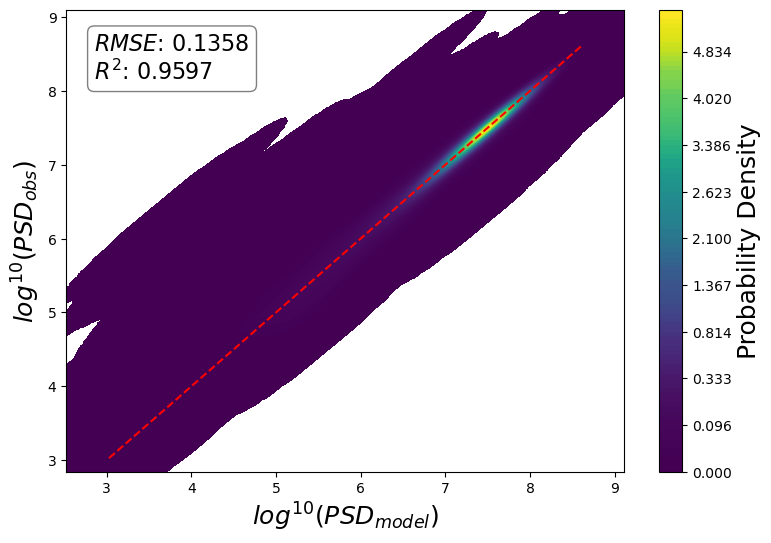

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# 显示负号
plt.rcParams['axes.unicode_minus'] = False
y_pred_scaled = model.predict([X_time_val, X_non_time_val])
# 反缩放预测结果
y_pred = scaler_target.inverse_transform(y_pred_scaled)
y_test_subset = scaler_target.inverse_transform(y_val)
y_test_exp = y_test_subset.flatten()
y_pred_exp = y_pred.flatten()
# 计算均方根误差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
r2 = r2_score(y_test_subset, y_pred)
print(f'测试集上的 RMSE: {rmse}',f'测试集上的 R2: {r2}')
# 创建绘图
plt.figure(figsize=(9, 6))

# 使用 Seaborn 的 kdeplot 绘制联合概率密度图
ax = sns.kdeplot(
    x=y_test_exp, 
    y=y_pred_exp, 
    cmap='viridis', 
    fill=True, 
    thresh=0, 
    levels=100,
    bw_adjust=1.5
)

# 添加理想拟合线
plt.plot(
    [y_test_exp.min(), y_test_exp.max()], 
    [y_test_exp.min(), y_test_exp.max()], 
    'r--', 
    label='理想拟合线'
)

# 提取绘图的颜色集合（PolyCollection）
collections = ax.collections

if collections:
    # 创建颜色条，基于第一个集合（KDE 图）
    cbar = plt.colorbar(collections[0], ax=ax)
    cbar.set_label('Probability Density',fontsize=18)

ax.text(
    0.05, 0.95, 
    f'$RMSE$: {rmse:.4f}\n$R^2$: {r2:.4f}', 
    transform=ax.transAxes,
    fontsize=16,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)
# plt.xlim(-8, -4)
# plt.ylim(-8, -4)
# # 添加图例
# plt.legend()

# 设置坐标轴标签和标题
plt.xlabel('$log^{10}(PSD_{model})$',fontsize=18)
plt.ylabel('$log^{10}(PSD_{obs})$',fontsize=18)
# plt.title('真实值与预测值的概率密度图')

# 显示图形
plt.show()

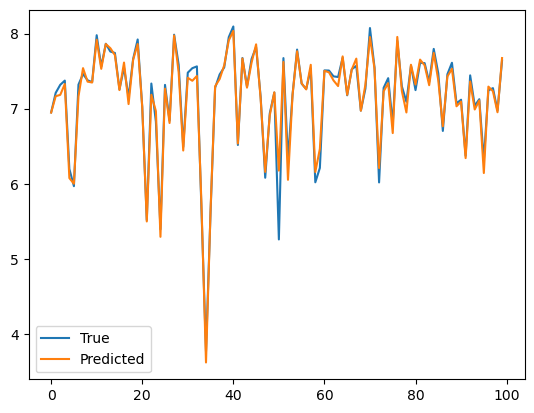

In [46]:
plt.plot(y_test_exp[:100], label='True')
plt.plot(y_pred_exp[:100], label='Predicted')
plt.legend()